# Import Library

In [1]:
# Manipulasi Data
import pandas as pd
import numpy as np
import datetime 

# Visualisasi Data
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as mpatches

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from yellowbrick.cluster import KElbowVisualizer

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data_2023 = pd.read_excel('dataset indo/data_to_model_2023.xlsx')
data_2022 = pd.read_excel('dataset indo/data_to_model_2022.xlsx')
data_2021 = pd.read_excel('dataset indo/data_to_model_2021.xlsx')

# Data Understanding

In [3]:
data_2023.head()

,Provinsi,Jumlah Ruang Kelas,Tenaga Pendidik,Jumlah Siswa,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,6501,16434,137657,8.376354,21.174742,702,353,83.41,93.80,71.70,9.40,74.46
1,SUMATERA UTARA,13488,26363,389899,14.789629,28.907103,363,1721,79.25,98.02,68.67,9.63,74.43
2,SUMATERA BARAT,5522,12763,153535,12.029695,27.804238,648,204,84.33,92.00,69.18,9.37,68.64
3,RIAU,6210,14059,172295,12.255139,27.744767,209,190,78.15,85.12,64.81,9.20,67.79
4,JAMBI,3110,7203,81429,11.304873,26.182958,203,128,72.46,85.23,60.60,8.53,66.62


In [4]:
data_2022.head()

,Provinsi,Jumlah Ruang Kelas,Tenaga Pendidik,Jumlah Siswa,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,6364,16376,131271,8.016060,20.627121,0,299,83.10,92.53,71.16,9.44,70.67
1,SUMATERA UTARA,13153,26046,384943,14.779352,29.266555,0,1263,78.66,97.23,68.27,9.71,77.16
2,SUMATERA BARAT,5397,12978,151928,11.706580,28.150454,0,241,83.71,90.66,68.38,9.18,65.96
3,RIAU,5899,13714,166690,12.154732,28.257332,0,232,77.32,84.85,63.87,9.22,66.91
4,JAMBI,2991,7219,78445,10.866463,26.227014,0,191,72.53,84.33,60.73,8.68,65.85


In [5]:
data_2021.head()

,Provinsi,Jumlah Ruang Kelas,Tenaga Pendidik,Jumlah Siswa,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,6841,16413,130229,7.934503,19.036544,0,693,83.28,92.63,70.80,9.37,74.36
1,SUMATERA UTARA,13860,25478,384886,15.106602,27.769553,0,982,78.66,96.75,67.99,9.58,72.81
2,SUMATERA BARAT,5750,13223,151414,11.450805,26.332870,0,212,84.07,90.38,68.99,9.07,70.06
3,RIAU,6206,13434,164971,12.280110,26.582501,0,389,77.81,84.11,64.00,9.19,68.94
4,JAMBI,3207,7100,77582,10.927042,24.191456,0,203,72.50,84.47,61.56,8.60,64.51


In [6]:
data = pd.concat([data_2021, data_2022, data_2023], ignore_index=True)
data

,Provinsi,Jumlah Ruang Kelas,Tenaga Pendidik,Jumlah Siswa,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,6841,16413,130229,7.934503,19.036544,0,693,83.28,92.63,70.80,9.37,74.36
1,SUMATERA UTARA,13860,25478,384886,15.106602,27.769553,0,982,78.66,96.75,67.99,9.58,72.81
2,SUMATERA BARAT,5750,13223,151414,11.450805,26.332870,0,212,84.07,90.38,68.99,9.07,70.06
3,RIAU,6206,13434,164971,12.280110,26.582501,0,389,77.81,84.11,64.00,9.19,68.94
4,JAMBI,3207,7100,77582,10.927042,24.191456,0,203,72.50,84.47,61.56,8.60,64.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,SULAWESI BARAT,1157,3001,29665,9.885038,25.639585,135,26,71.57,89.18,61.17,7.92,54.79
98,MALUKU,2983,7337,69590,9.484803,23.328864,103,281,79.90,95.96,66.16,10.14,75.01
99,MALUKU UTARA,1792,4139,44809,10.826045,25.005022,71,284,78.38,95.64,65.75,9.01,64.61
100,PAPUA BARAT,667,1365,16881,12.367033,25.308846,285,26,80.58,96.79,65.92,7.88,59.99


### Drop Fitur

In [7]:
# menghapus kolom yang tidak dibutuhkan
data = data.drop(['Jumlah Ruang Kelas', 'Tenaga Pendidik', 'Jumlah Siswa'], axis=1)

### EDA

In [8]:
data.describe().round(2)

,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,12.34,26.66,83.61,288.66,75.28,88.08,63.20,8.75,65.34
std,1.73,2.74,164.73,300.41,5.92,6.03,6.00,0.94,10.59
min,7.93,19.04,0.00,5.00,63.98,73.90,44.41,6.45,32.95
25%,11.21,25.03,0.00,92.00,70.89,85.14,60.20,8.04,60.32
50%,12.33,26.93,0.00,197.00,74.54,88.02,63.07,8.79,66.54
75%,13.43,28.51,114.25,362.75,79.30,93.08,66.68,9.34,69.90
max,16.34,32.11,866.00,1721.00,91.17,98.02,76.37,11.31,90.12


In [9]:
num = data.select_dtypes(include=['int','float']).columns

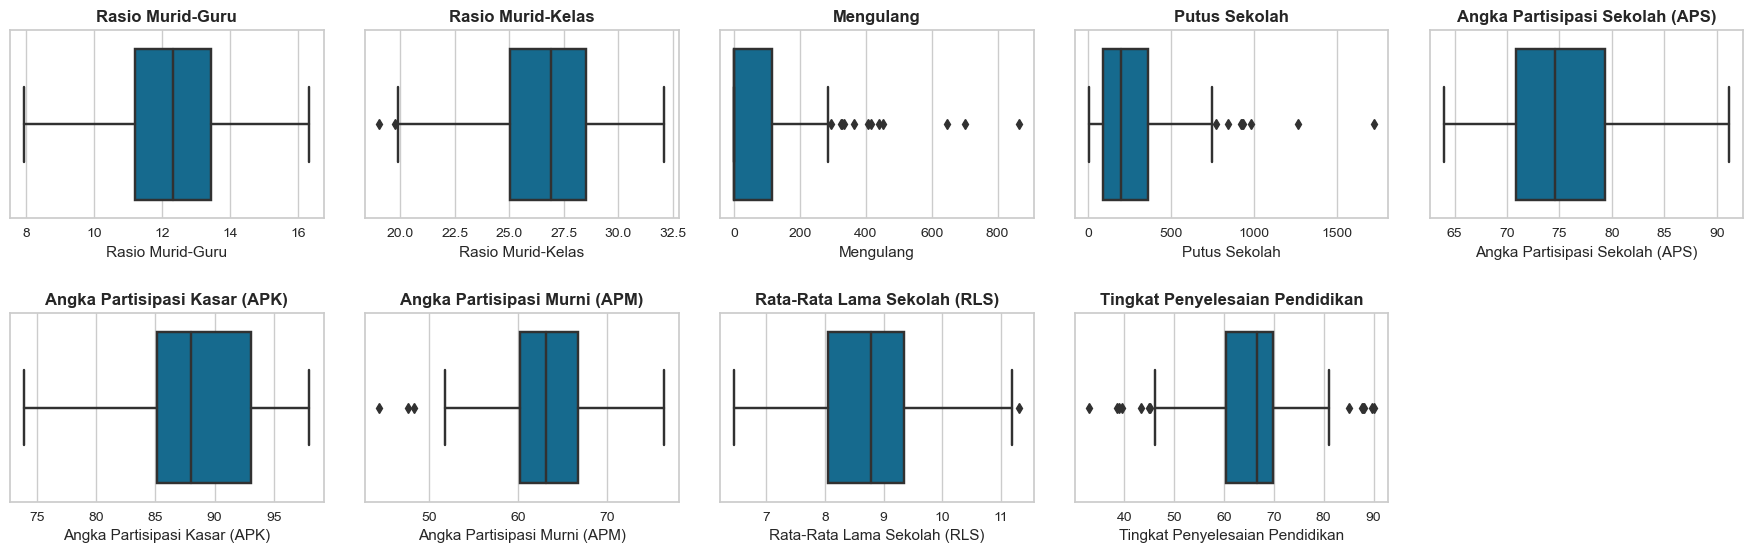

In [10]:
# Cek Outliers
num_plots = len(num)
num_rows = (num_plots // 5) + 1 
num_cols = 5 

rcParams['figure.figsize'] = 18, 3 * num_rows  
for i in range(0, len(num)):
    plt.subplot(num_rows, num_cols, i+1) 
    sns.boxplot(x=data[num[i]])
    plt.title(num[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)
plt.show()

In [11]:
corr = data[num].corr()

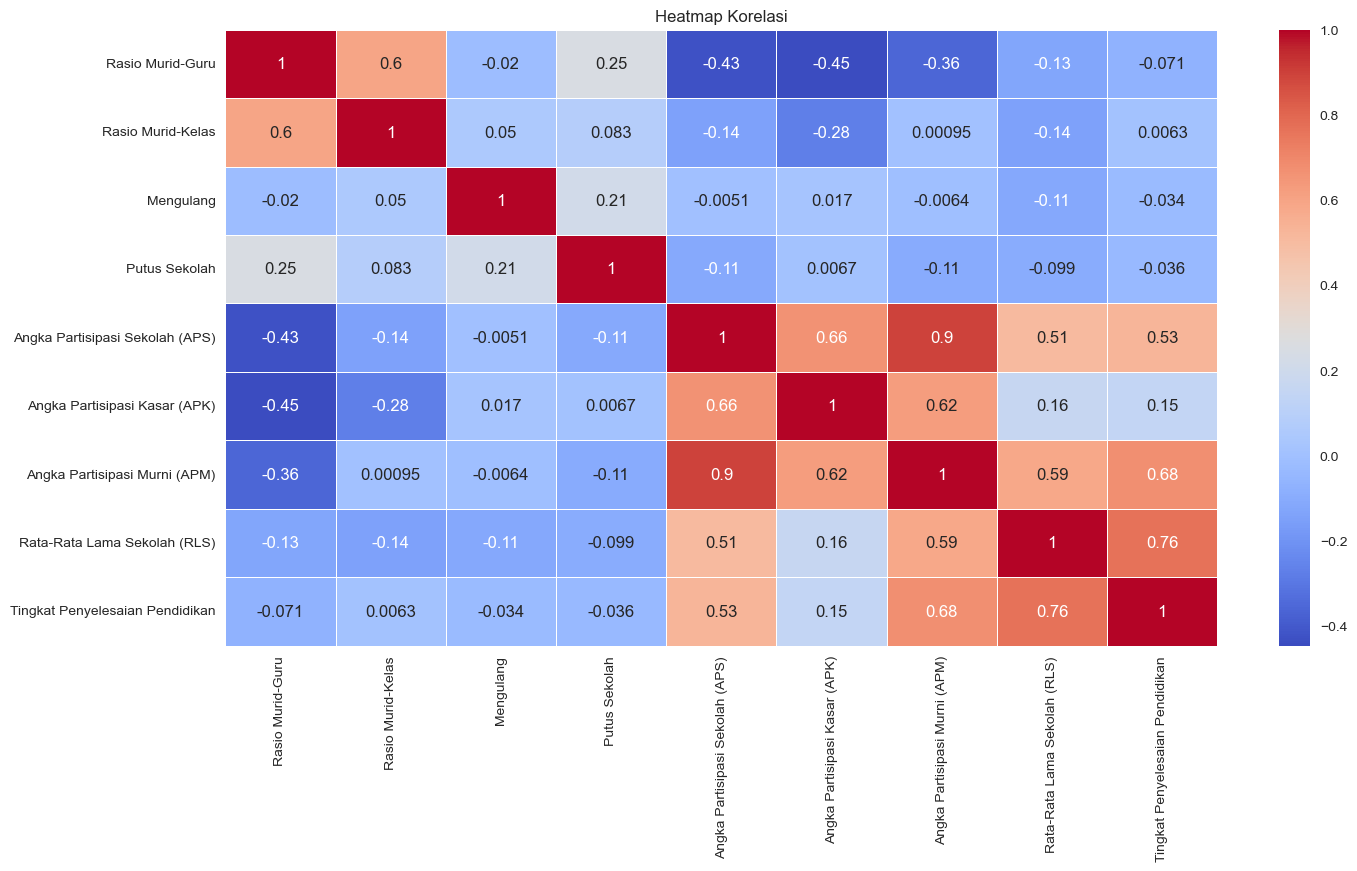

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [13]:
data.columns

Index(['Provinsi', 'Rasio Murid-Guru', 'Rasio Murid-Kelas', 'Mengulang',
       'Putus Sekolah', 'Angka Partisipasi Sekolah (APS)',
       'Angka Partisipasi Kasar (APK)', 'Angka Partisipasi Murni (APM)',
       'Rata-Rata Lama Sekolah (RLS)', 'Tingkat Penyelesaian Pendidikan'],
      dtype='object')

In [14]:
insight1 = data.groupby('Provinsi')[['Rasio Murid-Guru']].mean()
insight1['Persentase'] = insight1['Rasio Murid-Guru'] / insight1['Rasio Murid-Guru'].sum() * 100
insight1 = insight1.sort_values(by='Persentase', ascending=False)
insight1 = insight1.round(2)
insight1.head()

,Rasio Murid-Guru,Persentase
Provinsi,,
JAWA BARAT,16.16,3.85
BANTEN,15.27,3.64
KALIMANTAN BARAT,15.22,3.63
SUMATERA UTARA,14.89,3.55
JAWA TENGAH,14.12,3.36


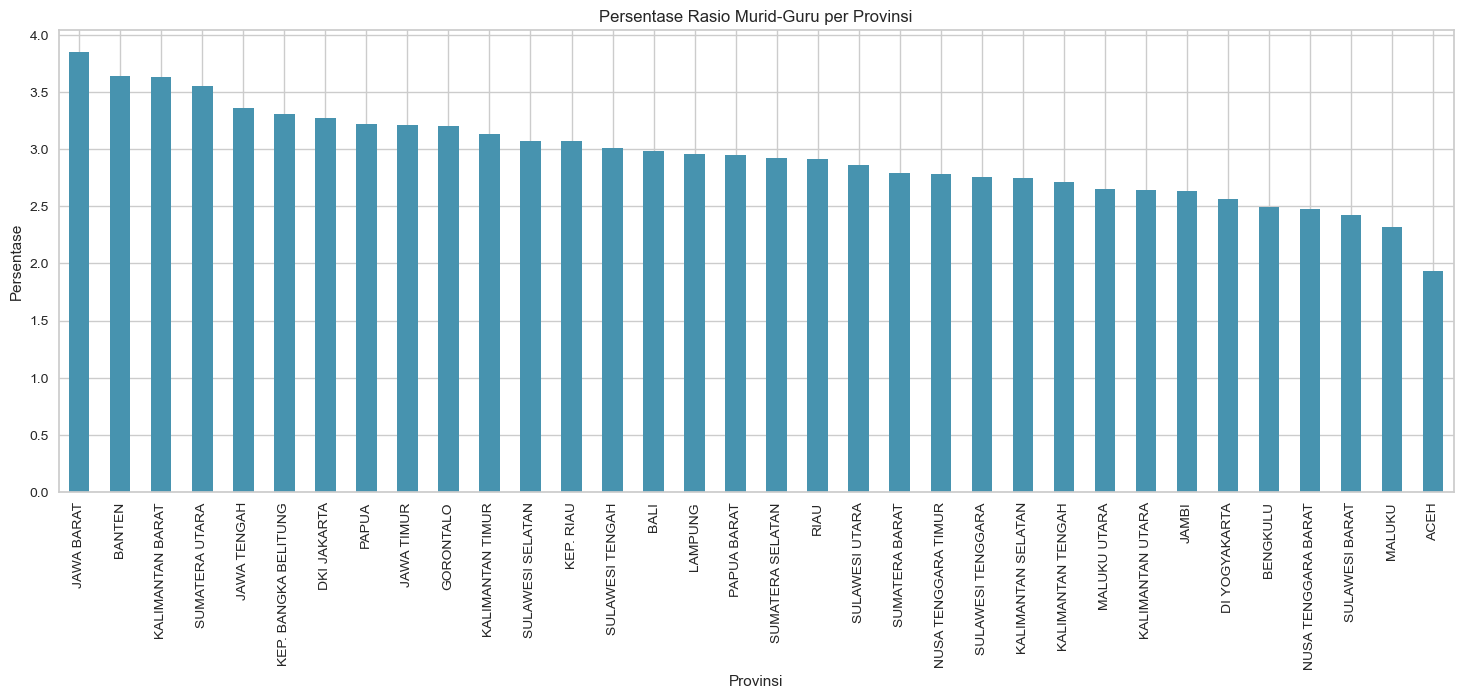

In [15]:
fig, ax = plt.subplots()

insight1['Persentase'].plot(kind='bar', color='#4793AF', ax=ax)
    
ax.set_xlabel('Provinsi')
ax.set_ylabel('Persentase')
ax.set_title('Persentase Rasio Murid-Guru per Provinsi')
ax.set_xticklabels(insight1.index, rotation=90)

plt.show()

In [16]:
insight2 = data.groupby('Provinsi')[['Mengulang', 'Putus Sekolah']].mean()
insight2['Total'] = insight2.sum(axis=1)
insight2['Persentase'] = insight2['Total'] / insight2['Total'].sum() * 100
insight2 = insight2.sort_values(by='Persentase', ascending=False)
insight2 = insight2.round(2)
insight2.head()

,Mengulang,Putus Sekolah,Total,Persentase
Provinsi,,,,
SUMATERA UTARA,121.00,1322.00,1443.00,11.40
JAWA TIMUR,288.67,835.67,1124.33,8.88
SULAWESI SELATAN,150.33,814.00,964.33,7.62
NUSA TENGGARA TIMUR,136.00,639.33,775.33,6.13
JAWA BARAT,108.67,630.67,739.33,5.84


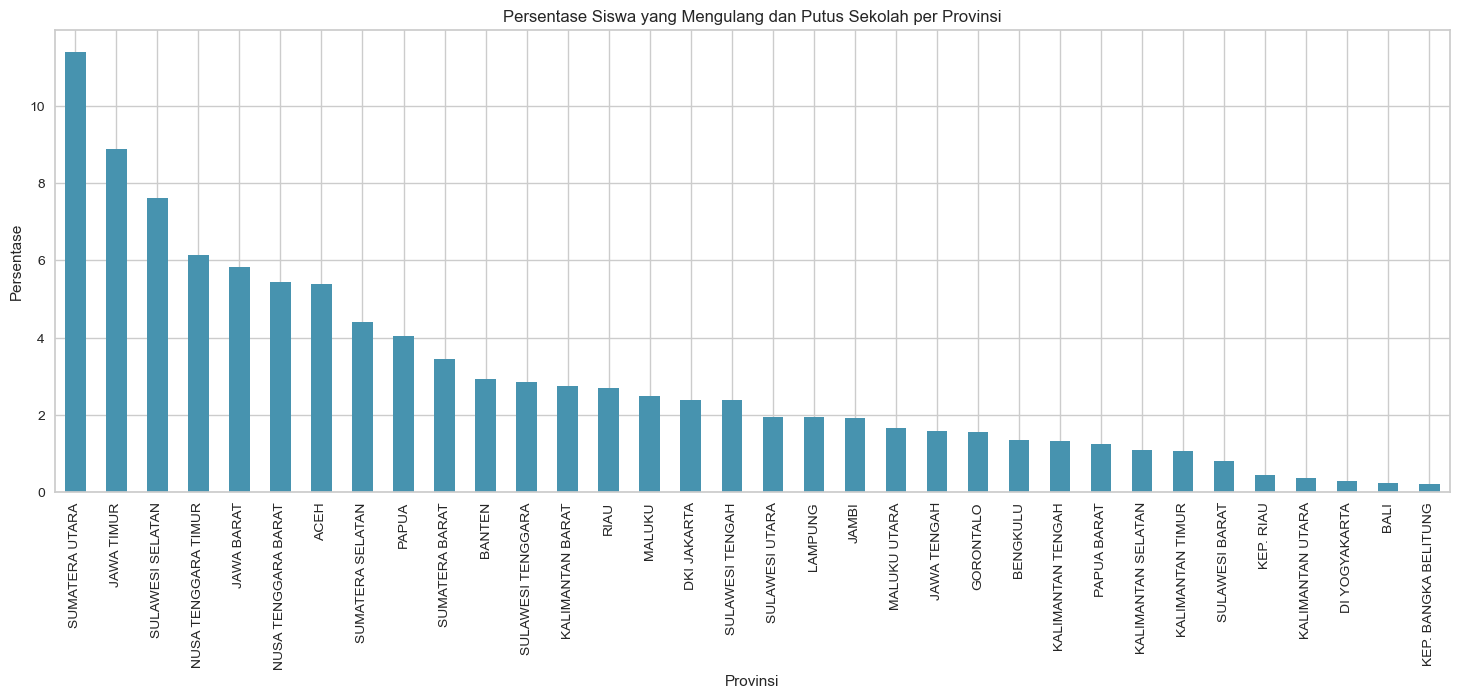

In [17]:
fig, ax = plt.subplots()

insight2['Persentase'].plot(kind='bar', color='#4793AF', ax=ax)

ax.set_xlabel('Provinsi')
ax.set_ylabel('Persentase')
ax.set_title('Persentase Siswa yang Mengulang dan Putus Sekolah per Provinsi')
ax.set_xticklabels(insight2.index, rotation=90)

plt.show()

In [18]:
insight3 = data.groupby('Provinsi')[['Angka Partisipasi Sekolah (APS)', 'Angka Partisipasi Kasar (APK)', 'Angka Partisipasi Murni (APM)']].mean()
insight3['Rata-rata'] = insight3.mean(axis=1)
insight3 = insight3.sort_values(by='Rata-rata', ascending=False)
insight3 = insight3.round(2)
insight3.head()

,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-rata
Provinsi,,,,
DI YOGYAKARTA,90.25,90.42,74.10,84.92
BALI,84.18,91.36,75.05,83.53
ACEH,83.26,92.99,71.22,82.49
KALIMANTAN TIMUR,81.65,95.26,69.43,82.11
KEP. RIAU,84.64,87.99,73.67,82.10


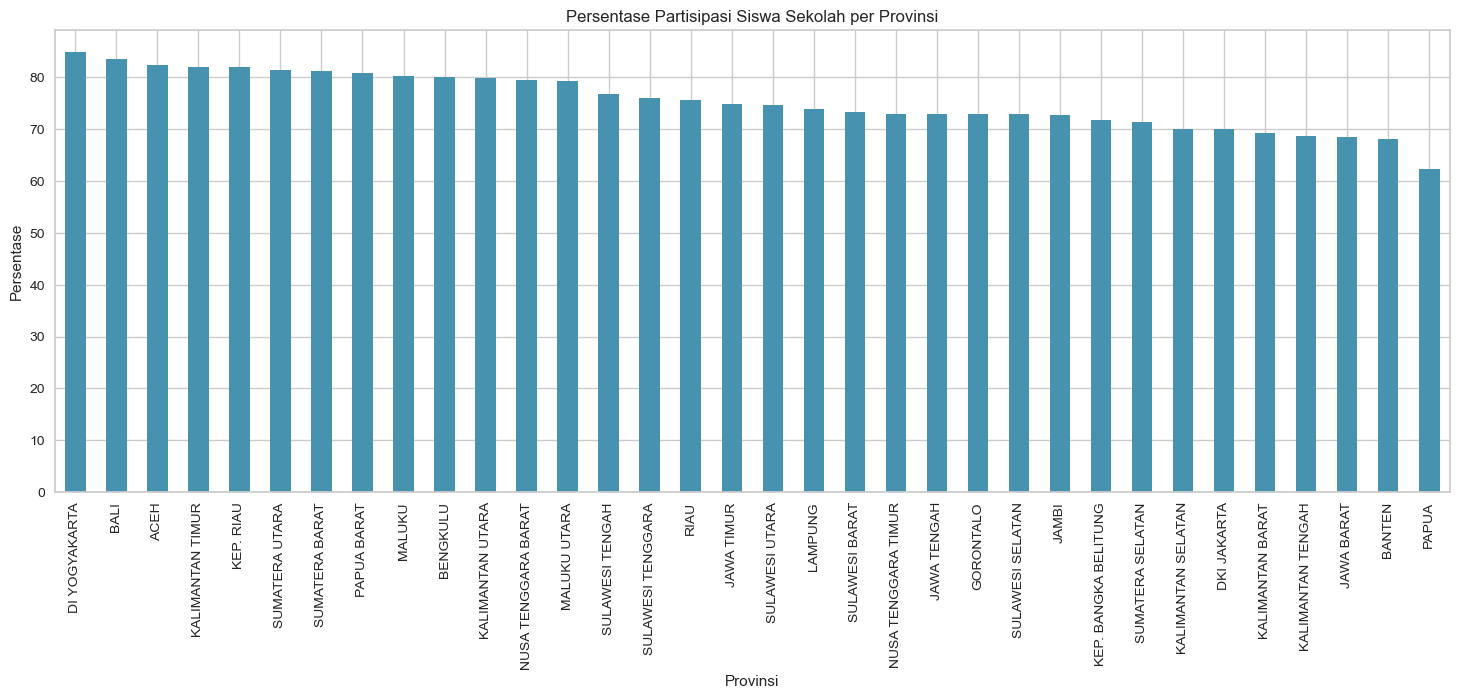

In [19]:
fig, ax = plt.subplots()

insight3['Rata-rata'].plot(kind='bar', color='#4793AF', ax=ax)

ax.set_xlabel('Provinsi')
ax.set_ylabel('Persentase')
ax.set_title('Persentase Partisipasi Siswa Sekolah per Provinsi')
ax.set_xticklabels(insight3.index, rotation=90)

plt.show()

In [20]:
insight4 = data.groupby('Provinsi')[['Rata-Rata Lama Sekolah (RLS)']].mean()
insight4 = insight4.sort_values(by='Rata-Rata Lama Sekolah (RLS)', ascending=False)
insight4 = insight4.round(2)
insight4.head()

,Rata-Rata Lama Sekolah (RLS)
Provinsi,
DKI JAKARTA,11.22
KEP. RIAU,10.31
MALUKU,10.12
KALIMANTAN TIMUR,9.85
SULAWESI UTARA,9.72


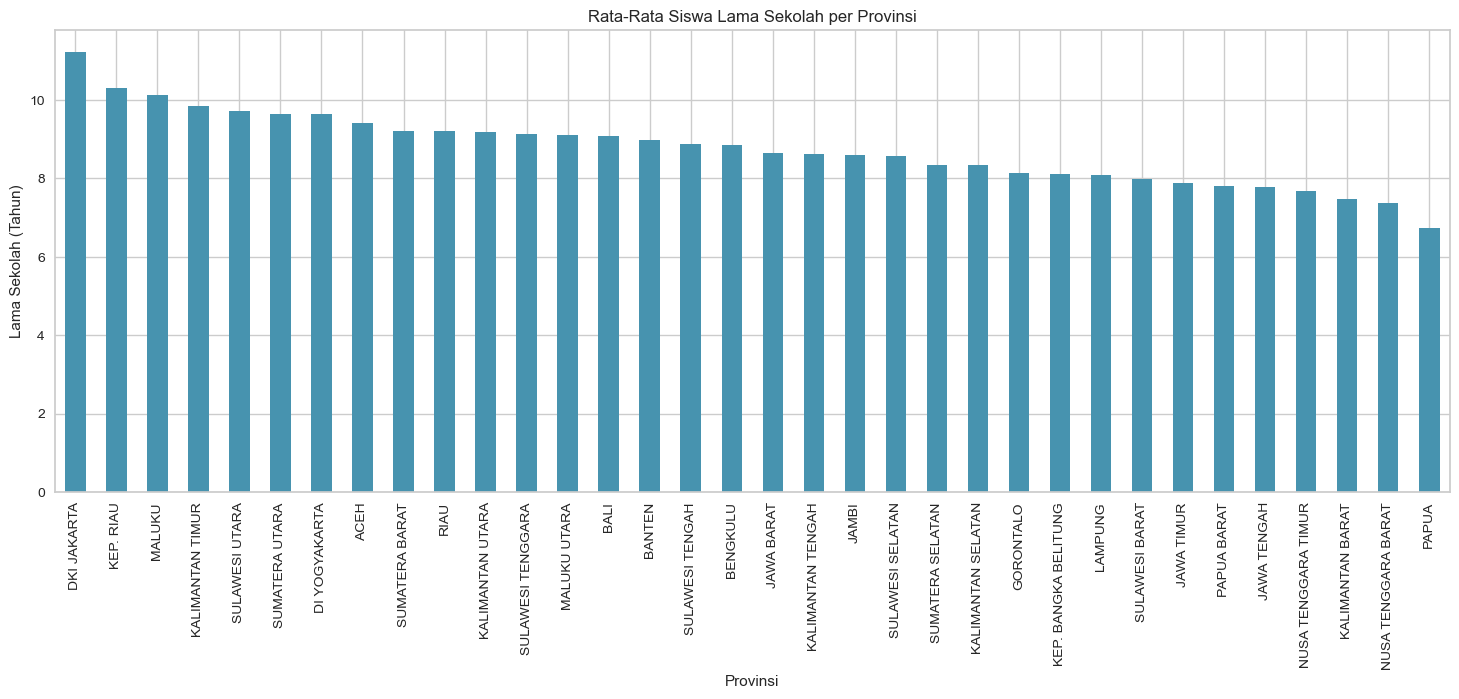

In [21]:
fig, ax = plt.subplots()

insight4['Rata-Rata Lama Sekolah (RLS)'].plot(kind='bar', color='#4793AF', ax=ax)

ax.set_xlabel('Provinsi')
ax.set_ylabel('Lama Sekolah (Tahun)')
ax.set_title('Rata-Rata Siswa Lama Sekolah per Provinsi')
ax.set_xticklabels(insight4.index, rotation=90)

plt.show()

In [22]:
insight5 = data.groupby('Provinsi')[['Tingkat Penyelesaian Pendidikan']].mean()
insight5 = insight5.sort_values(by='Tingkat Penyelesaian Pendidikan', ascending=False)
insight5 = insight5.round(2)
insight5.head()

,Tingkat Penyelesaian Pendidikan
Provinsi,
DI YOGYAKARTA,89.24
DKI JAKARTA,86.93
KEP. RIAU,77.99
BALI,76.32
SUMATERA UTARA,74.80


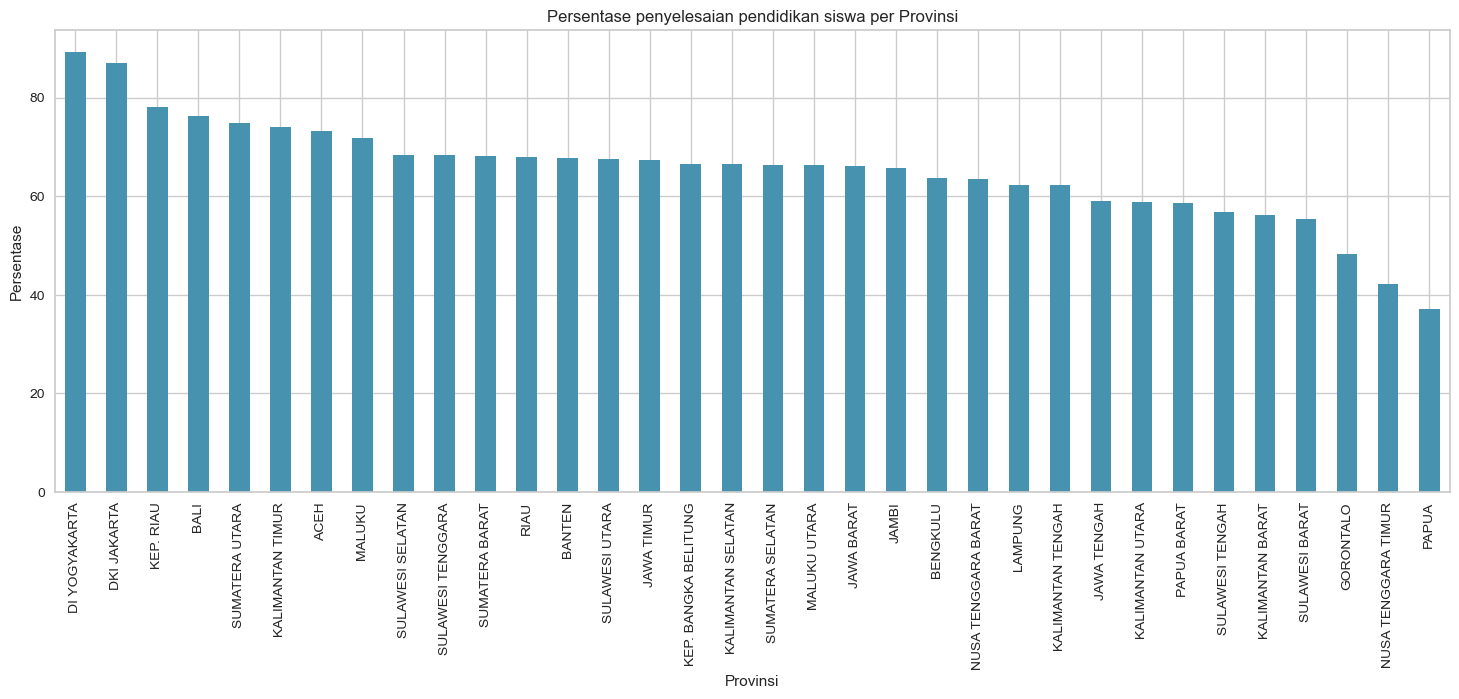

In [23]:
fig, ax = plt.subplots()

insight5['Tingkat Penyelesaian Pendidikan'].plot(kind='bar', color='#4793AF', ax=ax)

ax.set_xlabel('Provinsi')
ax.set_ylabel('Persentase')
ax.set_title('Persentase penyelesaian pendidikan siswa per Provinsi')
ax.set_xticklabels(insight5.index, rotation=90)

plt.show()

In [24]:
insight6 = data.groupby('Provinsi')[['Rasio Murid-Kelas']].mean()
insight6['Persentase'] = insight6['Rasio Murid-Kelas'] / insight6['Rasio Murid-Kelas'].sum() * 100
insight6 = insight6.sort_values(by='Persentase', ascending=False)
insight6 = insight6.round(2)
insight6.head()

,Rasio Murid-Kelas,Persentase
Provinsi,,
BALI,31.15,3.44
JAWA BARAT,30.77,3.39
JAWA TENGAH,30.07,3.32
BANTEN,29.21,3.22
KEP. BANGKA BELITUNG,29.16,3.22


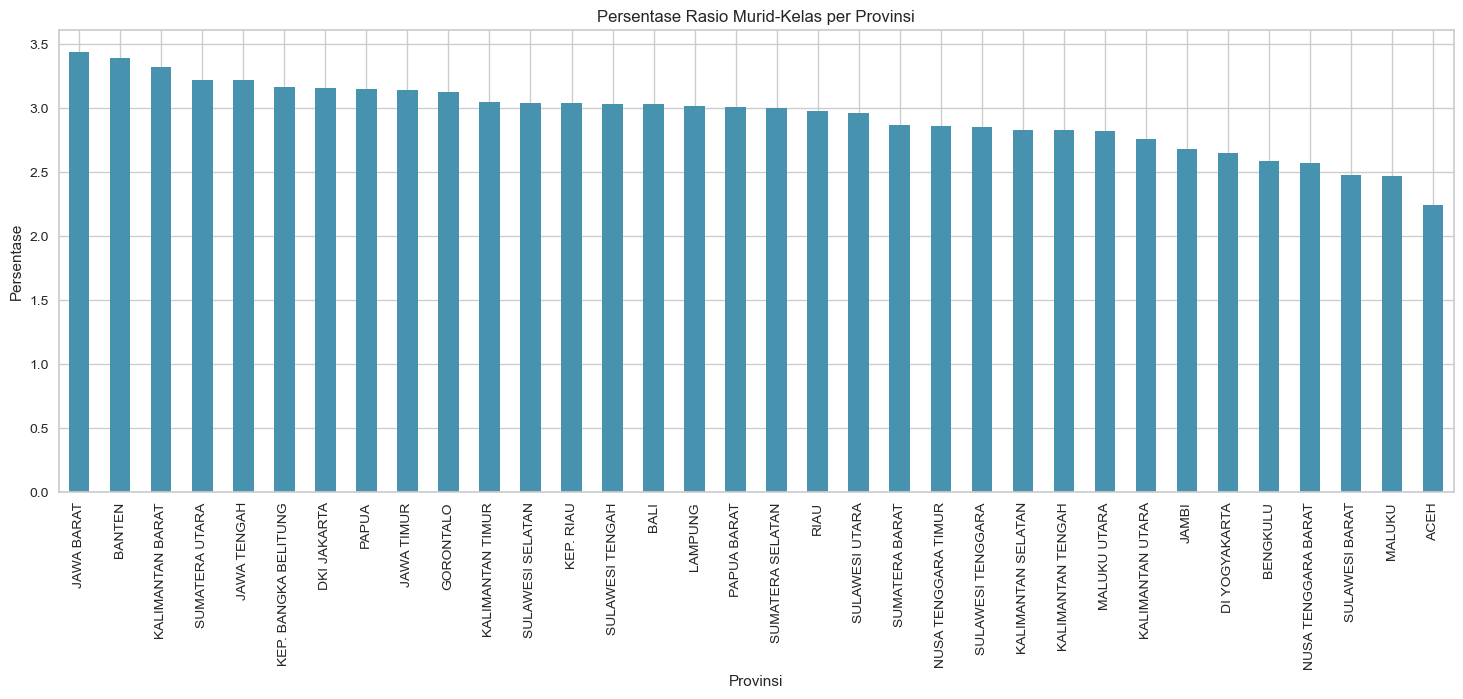

In [25]:
fig, ax = plt.subplots()

insight6['Persentase'].plot(kind='bar', color='#4793AF', ax=ax)
    
ax.set_xlabel('Provinsi')
ax.set_ylabel('Persentase')
ax.set_title('Persentase Rasio Murid-Kelas per Provinsi')
ax.set_xticklabels(insight1.index, rotation=90)

plt.show()

# Preparation / Preprocessing

In [26]:
data_clean = data.copy()

### Cek Tipe Data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provinsi                         102 non-null    object 
 1   Rasio Murid-Guru                 102 non-null    float64
 2   Rasio Murid-Kelas                102 non-null    float64
 3   Mengulang                        102 non-null    int64  
 4   Putus Sekolah                    102 non-null    int64  
 5   Angka Partisipasi Sekolah (APS)  102 non-null    float64
 6   Angka Partisipasi Kasar (APK)    102 non-null    float64
 7   Angka Partisipasi Murni (APM)    102 non-null    float64
 8   Rata-Rata Lama Sekolah (RLS)     102 non-null    float64
 9   Tingkat Penyelesaian Pendidikan  102 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 8.1+ KB


### Cek Missing Value

In [28]:
data_clean.isna().sum()

Provinsi                           0
Rasio Murid-Guru                   0
Rasio Murid-Kelas                  0
Mengulang                          0
Putus Sekolah                      0
Angka Partisipasi Sekolah (APS)    0
Angka Partisipasi Kasar (APK)      0
Angka Partisipasi Murni (APM)      0
Rata-Rata Lama Sekolah (RLS)       0
Tingkat Penyelesaian Pendidikan    0
dtype: int64

In [29]:
data_clean.isnull().sum()

Provinsi                           0
Rasio Murid-Guru                   0
Rasio Murid-Kelas                  0
Mengulang                          0
Putus Sekolah                      0
Angka Partisipasi Sekolah (APS)    0
Angka Partisipasi Kasar (APK)      0
Angka Partisipasi Murni (APM)      0
Rata-Rata Lama Sekolah (RLS)       0
Tingkat Penyelesaian Pendidikan    0
dtype: int64

### Cek Duplicated

In [30]:
data_clean.duplicated().sum()

0

### Cek Outliers

In [31]:
# Cek Outlier
print(f'Jumlah baris: {len(data_clean)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(data_clean))
for col in num:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #mulai filter outlier
    filter_outlier = ((data_clean[col] >= low_limit) & (data_clean[col] <= high_limit))
    outlier.append(len(data_clean[~filter_outlier]))
    no_outlier.append(len(data_clean[filter_outlier]))
    is_outlier.append(data_clean[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((data_clean[col] >= low_limit) & (data_clean[col] <= high_limit)) & filtered_entries

print("Outlier:", len(data_clean[~filtered_entries]))
print("Not Outlier:", len(data_clean[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num,
    "is Outlier": is_outlier,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 102
Outlier: 31
Not Outlier: 71



,Column Name,is Outlier,Outlier,No Outlier
0,Rasio Murid-Guru,False,0,102
1,Rasio Murid-Kelas,True,2,100
2,Mengulang,True,12,90
3,Putus Sekolah,True,8,94
4,Angka Partisipasi Sekolah (APS),False,0,102
5,Angka Partisipasi Kasar (APK),False,0,102
6,Angka Partisipasi Murni (APM),True,3,99
7,Rata-Rata Lama Sekolah (RLS),True,1,101
8,Tingkat Penyelesaian Pendidikan,True,13,89


### Aggregasi

In [32]:
data_agg = data_clean.groupby('Provinsi').agg({
    'Rasio Murid-Guru': 'mean', 
    'Rasio Murid-Kelas': 'mean', 
    'Mengulang': 'mean',
    'Putus Sekolah': 'mean', 
    'Angka Partisipasi Sekolah (APS)': 'mean',
    'Angka Partisipasi Kasar (APK)': 'mean', 
    'Angka Partisipasi Murni (APM)': 'mean',
    'Rata-Rata Lama Sekolah (RLS)': 'mean',
    'Tingkat Penyelesaian Pendidikan': 'mean'
}).reset_index()

In [33]:
data_agg.head()

,Provinsi,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,8.108972,20.279469,234.000000,448.333333,83.263333,92.986667,71.220000,9.403333,73.163333
1,BALI,12.513116,31.154070,1.333333,26.666667,84.176667,91.363333,75.050000,9.083333,76.320000
2,BANTEN,15.269076,29.214228,61.666667,308.333333,69.266667,75.390000,59.883333,8.970000,67.663333
3,BENGKULU,10.438789,26.856998,39.333333,130.666667,79.543333,94.096667,66.593333,8.860000,63.583333
4,DI YOGYAKARTA,10.751665,26.038622,26.333333,9.333333,90.250000,90.416667,74.096667,9.633333,89.243333


### Transformasi

In [34]:
data_tranform = data_agg.copy()

In [35]:
data_tranform['Putus Sekolah'] = -data_tranform['Putus Sekolah']
data_tranform['Mengulang'] = -data_tranform['Mengulang']

In [36]:
data_tranform.head()

,Provinsi,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,8.108972,20.279469,-234.000000,-448.333333,83.263333,92.986667,71.220000,9.403333,73.163333
1,BALI,12.513116,31.154070,-1.333333,-26.666667,84.176667,91.363333,75.050000,9.083333,76.320000
2,BANTEN,15.269076,29.214228,-61.666667,-308.333333,69.266667,75.390000,59.883333,8.970000,67.663333
3,BENGKULU,10.438789,26.856998,-39.333333,-130.666667,79.543333,94.096667,66.593333,8.860000,63.583333
4,DI YOGYAKARTA,10.751665,26.038622,-26.333333,-9.333333,90.250000,90.416667,74.096667,9.633333,89.243333


### Split Data

In [37]:
X = data_tranform.iloc[:,1:15]
y = data_tranform.iloc[:, 0]

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X.head()

,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,8.108972,20.279469,-234.000000,-448.333333,83.263333,92.986667,71.220000,9.403333,73.163333
1,12.513116,31.154070,-1.333333,-26.666667,84.176667,91.363333,75.050000,9.083333,76.320000
2,15.269076,29.214228,-61.666667,-308.333333,69.266667,75.390000,59.883333,8.970000,67.663333
3,10.438789,26.856998,-39.333333,-130.666667,79.543333,94.096667,66.593333,8.860000,63.583333
4,10.751665,26.038622,-26.333333,-9.333333,90.250000,90.416667,74.096667,9.633333,89.243333


In [38]:
y.head()

,Provinsi
0,ACEH
1,BALI
2,BANTEN
3,BENGKULU
4,DI YOGYAKARTA


### Normalisasi Data

In [39]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,0.000000,0.000000,0.190255,0.665566,0.726692,0.802394,0.864489,0.594192,0.691304
1,0.547172,1.000000,1.000000,0.986795,0.762420,0.728595,1.000000,0.522710,0.751904
2,0.889573,0.821617,0.790023,0.772219,0.179163,0.002425,0.463380,0.497394,0.585717
3,0.289457,0.604852,0.867749,0.907567,0.581171,0.852856,0.700790,0.472822,0.507391
4,0.328329,0.529597,0.912993,1.000000,1.000000,0.685558,0.966270,0.645570,1.000000


In [40]:
# array = np.array(X_scaled)
# array

In [41]:
data_norm = pd.concat([y, X_scaled], axis=1)
data_norm.head()

,Provinsi,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan
0,ACEH,0.000000,0.000000,0.190255,0.665566,0.726692,0.802394,0.864489,0.594192,0.691304
1,BALI,0.547172,1.000000,1.000000,0.986795,0.762420,0.728595,1.000000,0.522710,0.751904
2,BANTEN,0.889573,0.821617,0.790023,0.772219,0.179163,0.002425,0.463380,0.497394,0.585717
3,BENGKULU,0.289457,0.604852,0.867749,0.907567,0.581171,0.852856,0.700790,0.472822,0.507391
4,DI YOGYAKARTA,0.328329,0.529597,0.912993,1.000000,1.000000,0.685558,0.966270,0.645570,1.000000


# Model

### Compare model

In [42]:
# K-Means Clustering
def kmeans_clustering(X_scaled, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    silhouette = silhouette_score(X_scaled, labels)
    return dbi, silhouette

# Agglomerative Clustering
def agglomerative_clustering(X_scaled, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='euclidean')
    labels = agglomerative.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    silhouette = silhouette_score(X_scaled, labels)
    return dbi, silhouette

# K-Medoids Clustering
def kmedoids_clustering(X_scaled, n_clusters):
    kmedoids = KMedoids(n_clusters=n_clusters, metric='euclidean', random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    dbi = davies_bouldin_score(X_scaled, labels)
    silhouette = silhouette_score(X_scaled, labels)
    return dbi, silhouette

In [43]:
n_clusters_range = range(2, 10)

kmeans_dbi_scores = []
kmeans_silhouette_scores = []
agglomerative_dbi_scores = []
agglomerative_silhouette_scores = []
kmedoids_dbi_scores = []
kmedoids_silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans_dbi, kmeans_silhouette = kmeans_clustering(X_scaled, n_clusters)
    kmeans_dbi_scores.append(kmeans_dbi)
    kmeans_silhouette_scores.append(kmeans_silhouette)
    
    agglomerative_dbi, agglomerative_silhouette = agglomerative_clustering(X_scaled, n_clusters)
    agglomerative_dbi_scores.append(agglomerative_dbi)
    agglomerative_silhouette_scores.append(agglomerative_silhouette)
    
    kmedoids_dbi, kmedoids_silhouette = kmedoids_clustering(X_scaled, n_clusters)
    kmedoids_dbi_scores.append(kmedoids_dbi)
    kmedoids_silhouette_scores.append(kmedoids_silhouette)

# Buat DataFrame untuk menampilkan hasil DBI
results_dbi = pd.DataFrame({
    'Jumlah Cluster': list(n_clusters_range),
    'K-Means DBI': kmeans_dbi_scores,
    'Agglomerative DBI': agglomerative_dbi_scores,
    'K-Medoids DBI': kmedoids_dbi_scores,
})

# Buat DataFrame untuk menampilkan hasil Silhouette
results_Silhouette = pd.DataFrame({
    'Jumlah Cluster': list(n_clusters_range),
    'K-Means Silhouette': kmeans_silhouette_scores,
    'Agglomerative Silhouette': agglomerative_silhouette_scores,
    'K-Medoids Silhouette': kmedoids_silhouette_scores,
})

  File "C:\Users\Siswantoro\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [44]:
results_dbi

,Jumlah Cluster,K-Means DBI,Agglomerative DBI,K-Medoids DBI
0,2,1.487884,0.497102,2.229189
1,3,1.419380,0.520930,2.410313
2,4,1.345247,0.522340,1.789932
3,5,1.290894,0.748404,1.860118
4,6,1.117034,0.804286,1.816616
5,7,1.086292,0.879134,1.552283
6,8,0.945578,0.817564,1.499086
7,9,1.026696,0.751416,1.452921


In [45]:
results_Silhouette

,Jumlah Cluster,K-Means Silhouette,Agglomerative Silhouette,K-Medoids Silhouette
0,2,0.234464,0.300470,0.099770
1,3,0.212086,0.174871,0.070453
2,4,0.212559,0.153413,0.102269
3,5,0.217019,0.147553,0.099502
4,6,0.215560,0.177168,0.083340
5,7,0.175473,0.181755,0.082750
6,8,0.210429,0.163060,0.008556
7,9,0.204606,0.151649,-0.014107


In [46]:
# Cari nilai DBI terbaik untuk masing-masing metode clustering
best_kmeans_dbi = results_dbi['K-Means DBI'].min()
best_kmeans_clusters_dbi = results_dbi.loc[results_dbi['K-Means DBI'] == best_kmeans_dbi, 'Jumlah Cluster'].values[0]

best_agglomerative_dbi = results_dbi['Agglomerative DBI'].min()
best_agglomerative_clusters_dbi = results_dbi.loc[results_dbi['Agglomerative DBI'] == best_agglomerative_dbi, 'Jumlah Cluster'].values[0]

best_kmedoids_dbi = results_dbi['K-Medoids DBI'].min()
best_kmedoids_clusters_dbi = results_dbi.loc[results_dbi['K-Medoids DBI'] == best_kmedoids_dbi, 'Jumlah Cluster'].values[0]

# Buat DataFrame untuk menampilkan nilai DBI terbaik
best_dbi_results = pd.DataFrame({
    'Metode': ['K-Means', 'Agglomerative', 'K-Medoids'],
    'DBI Terbaik': [best_kmeans_dbi, best_agglomerative_dbi, best_kmedoids_dbi],
    'Jumlah Cluster Terbaik': [best_kmeans_clusters_dbi, best_agglomerative_clusters_dbi, best_kmedoids_clusters_dbi]
})

best_dbi_results.sort_values(by='DBI Terbaik', ascending=True)

,Metode,DBI Terbaik,Jumlah Cluster Terbaik
1,Agglomerative,0.497102,2
0,K-Means,0.945578,8
2,K-Medoids,1.452921,9


In [47]:
# Cari nilai Silhouette terbaik untuk masing-masing metode clustering
best_kmeans_silhouette = results_Silhouette['K-Means Silhouette'].max()
best_kmeans_clusters_silhouette = results_Silhouette.loc[results_Silhouette['K-Means Silhouette'] == best_kmeans_silhouette, 'Jumlah Cluster'].values[0]

best_agglomerative_silhouette = results_Silhouette['Agglomerative Silhouette'].max()
best_agglomerative_clusters_silhouette = results_Silhouette.loc[results_Silhouette['Agglomerative Silhouette'] == best_agglomerative_silhouette, 'Jumlah Cluster'].values[0]

best_kmedoids_silhouette = results_Silhouette['K-Medoids Silhouette'].max()
best_kmedoids_clusters_silhouette = results_Silhouette.loc[results_Silhouette['K-Medoids Silhouette'] == best_kmedoids_silhouette, 'Jumlah Cluster'].values[0]

# Buat DataFrame untuk menampilkan nilai Silhouette terbaik
best_silhouette_results = pd.DataFrame({
    'Metode': ['K-Means', 'Agglomerative', 'K-Medoids'],
    'Silhouette Terbaik': [best_kmeans_silhouette, best_agglomerative_silhouette, best_kmedoids_silhouette],
    'Jumlah Cluster Terbaik': [best_kmeans_clusters_silhouette, best_agglomerative_clusters_silhouette, best_kmedoids_clusters_silhouette]
})

best_silhouette_results.sort_values(by='Silhouette Terbaik', ascending=False)

,Metode,Silhouette Terbaik,Jumlah Cluster Terbaik
1,Agglomerative,0.300470,2
0,K-Means,0.234464,2
2,K-Medoids,0.102269,4


### Model Terbaik

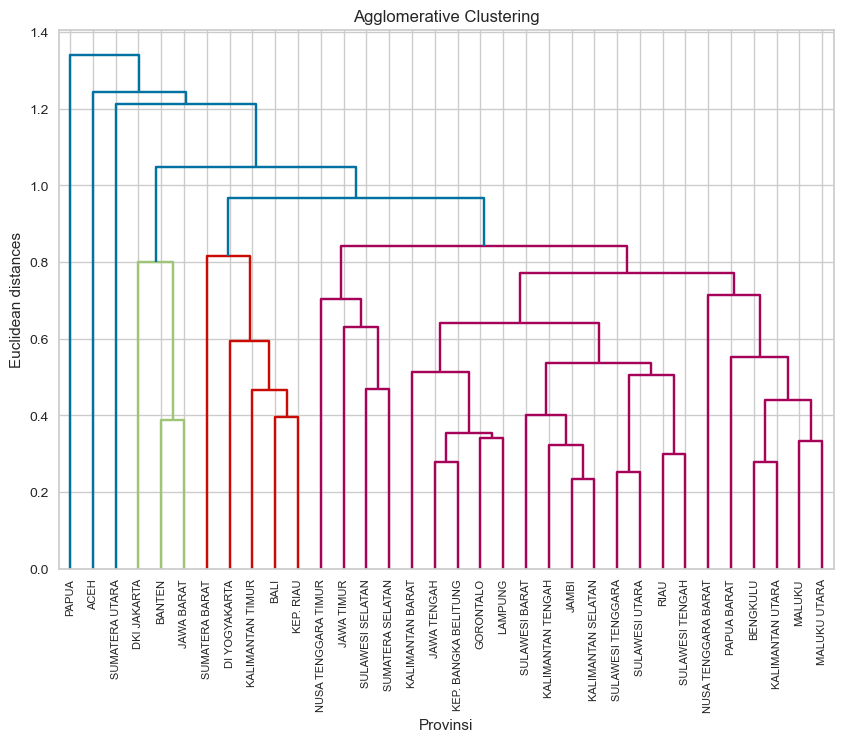

In [48]:
Z = linkage(X_scaled, method='average', metric='euclidean')

# Buat dendrogram
plt.figure(figsize=(10, 7))
dendro = dendrogram(Z, labels=data_agg['Provinsi'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Agglomerative Clustering')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean distances')
plt.show()

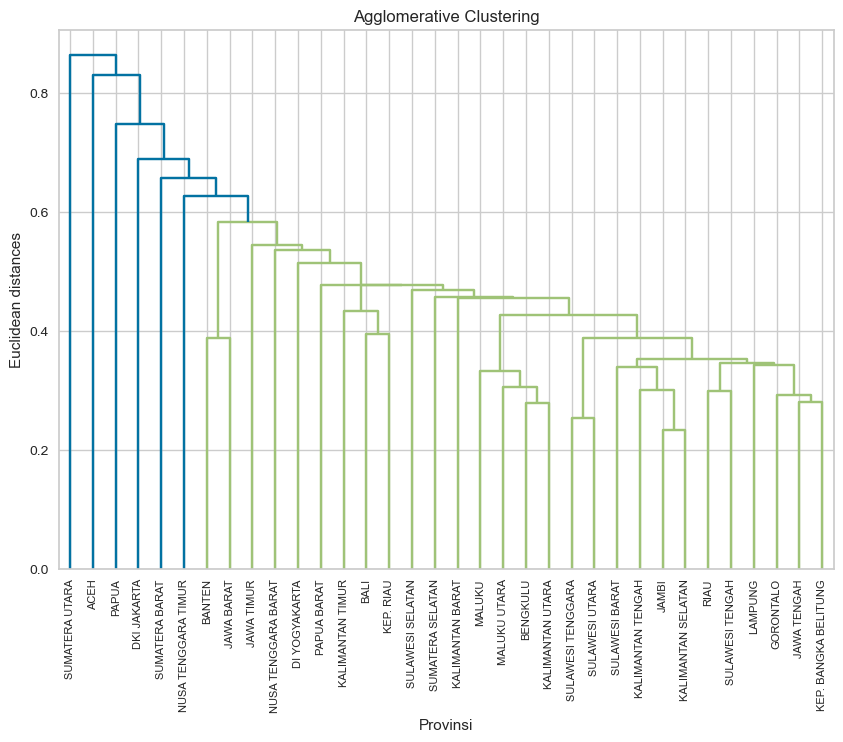

In [49]:
Z = linkage(X_scaled, method='single', metric='euclidean')

# Buat dendrogram
plt.figure(figsize=(10, 7))
dendro = dendrogram(Z, labels=data_agg['Provinsi'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Agglomerative Clustering')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean distances')
plt.show()

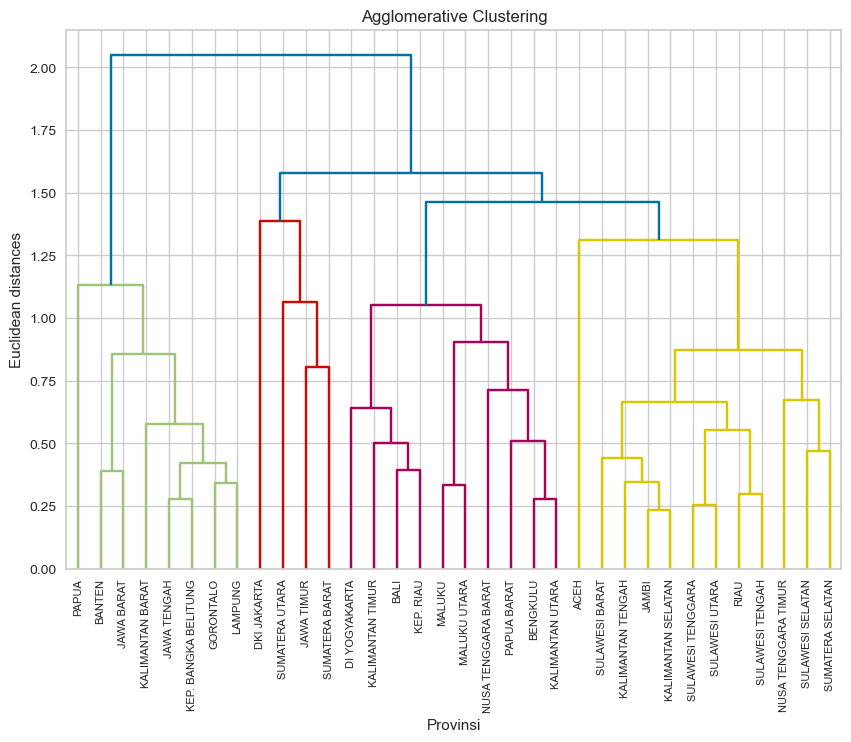

In [50]:
Z = linkage(X_scaled, method='complete', metric='euclidean')

# Buat dendrogram
plt.figure(figsize=(10, 7))
dendro = dendrogram(Z, labels=data_agg['Provinsi'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Agglomerative Clustering')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean distances')
plt.show()

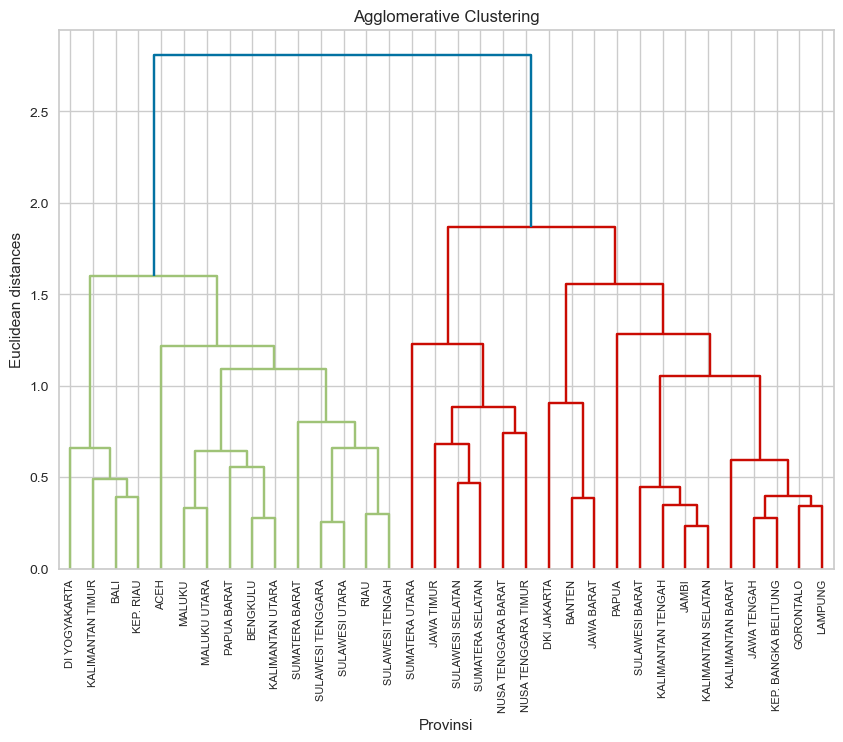

In [51]:
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Buat dendrogram
plt.figure(figsize=(10, 7))
dendro = dendrogram(Z, labels=data_agg['Provinsi'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Agglomerative Clustering')
plt.xlabel('Provinsi')
plt.ylabel('Euclidean distances')
plt.show()

In [52]:
k = 2
model = AgglomerativeClustering(n_clusters=k, linkage='average', affinity='euclidean')
model.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', linkage='average')

In [53]:
labels = model.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Pengelompokkan berdasarkan klaster

In [54]:
# gabungkan hasil yang telah dilakukan model
data_model = pd.concat([y, X_scaled], axis=1).round(5)
data_model['clusters'] = labels

In [55]:
data_model = data_model.sort_values(by='clusters', ascending=True)
data_model

,Provinsi,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan,clusters
0,ACEH,0.00000,0.00000,0.19026,0.66557,0.72669,0.80239,0.86449,0.59419,0.69130,0
31,SUMATERA BARAT,0.44976,0.65747,0.25290,0.84027,0.75694,0.71268,0.78063,0.55026,0.59640,0
30,SULAWESI UTARA,0.48158,0.20029,0.62297,0.90300,0.37397,0.48826,0.59123,0.66418,0.58444,0
29,SULAWESI TENGGARA,0.42994,0.29801,0.61833,0.81615,0.39236,0.65070,0.60679,0.53313,0.59794,0
28,SULAWESI TENGAH,0.56277,0.61997,0.75986,0.83139,0.44843,0.58691,0.67201,0.47580,0.37832,0
27,SULAWESI SELATAN,0.59387,0.51368,0.48144,0.38700,0.24723,0.53932,0.48355,0.40581,0.59960,0
26,SULAWESI BARAT,0.25597,0.43822,0.84803,0.96445,0.25531,0.58857,0.48142,0.27774,0.35023,0
25,RIAU,0.51200,0.66657,0.76218,0.80117,0.51141,0.42537,0.61705,0.54952,0.58988,0
24,PAPUA BARAT,0.53085,0.34153,0.67401,0.95912,0.62968,0.99621,0.62189,0.23678,0.41390,0
22,NUSA TENGGARA TIMUR,0.44103,0.49593,0.53132,0.52006,0.43278,0.53629,0.33117,0.20849,0.09823,0


In [56]:
# Anggota cluster 1
C1 = data_model[data_model.clusters == 0]
C1

,Provinsi,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan,clusters
0,ACEH,0.00000,0.00000,0.19026,0.66557,0.72669,0.80239,0.86449,0.59419,0.69130,0
31,SUMATERA BARAT,0.44976,0.65747,0.25290,0.84027,0.75694,0.71268,0.78063,0.55026,0.59640,0
30,SULAWESI UTARA,0.48158,0.20029,0.62297,0.90300,0.37397,0.48826,0.59123,0.66418,0.58444,0
29,SULAWESI TENGGARA,0.42994,0.29801,0.61833,0.81615,0.39236,0.65070,0.60679,0.53313,0.59794,0
28,SULAWESI TENGAH,0.56277,0.61997,0.75986,0.83139,0.44843,0.58691,0.67201,0.47580,0.37832,0
27,SULAWESI SELATAN,0.59387,0.51368,0.48144,0.38700,0.24723,0.53932,0.48355,0.40581,0.59960,0
26,SULAWESI BARAT,0.25597,0.43822,0.84803,0.96445,0.25531,0.58857,0.48142,0.27774,0.35023,0
25,RIAU,0.51200,0.66657,0.76218,0.80117,0.51141,0.42537,0.61705,0.54952,0.58988,0
24,PAPUA BARAT,0.53085,0.34153,0.67401,0.95912,0.62968,0.99621,0.62189,0.23678,0.41390,0
22,NUSA TENGGARA TIMUR,0.44103,0.49593,0.53132,0.52006,0.43278,0.53629,0.33117,0.20849,0.09823,0


In [57]:
# Anggota cluster 2
C2 = data_model[data_model.clusters == 1]
C2

,Provinsi,Rasio Murid-Guru,Rasio Murid-Kelas,Mengulang,Putus Sekolah,Angka Partisipasi Sekolah (APS),Angka Partisipasi Kasar (APK),Angka Partisipasi Murni (APM),Rata-Rata Lama Sekolah (RLS),Tingkat Penyelesaian Pendidikan,clusters
23,PAPUA,0.66907,0.63439,0.4942,0.73032,0.0,0.0,0.0,0.0,0.0,1


# Evaluasi

In [58]:
linkage_methods = ['single', 'complete', 'average', 'ward']

linkage_results = []

for method in linkage_methods:
    Z = linkage(X_scaled, method=method)
    c, _ = cophenet(Z, pdist(X_scaled))
    linkage_results.append([method, c])

linkage_results = pd.DataFrame(linkage_results, columns=['Linkage Method', 'Cophenetic Correlation Coefficient'])

linkage_results.sort_values(by='Cophenetic Correlation Coefficient', ascending=False)

,Linkage Method,Cophenetic Correlation Coefficient
2,average,0.754208
0,single,0.673888
1,complete,0.478489
3,ward,0.470592


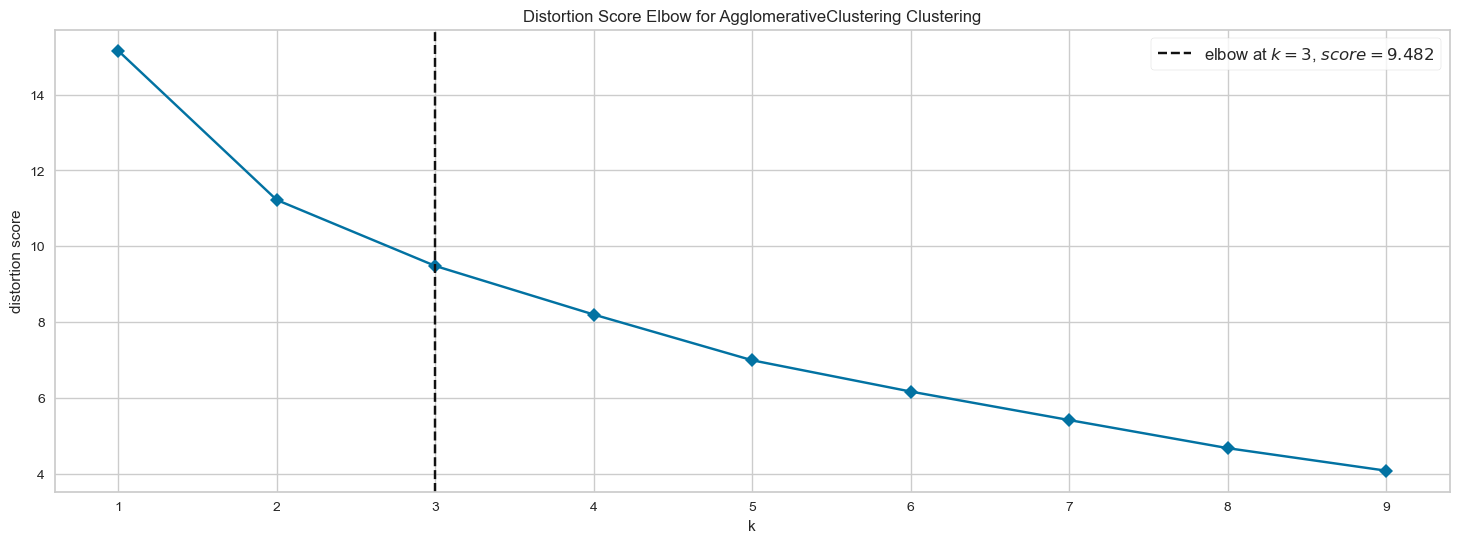

In [59]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(X_scaled)
visualizer.show()
plt.show()

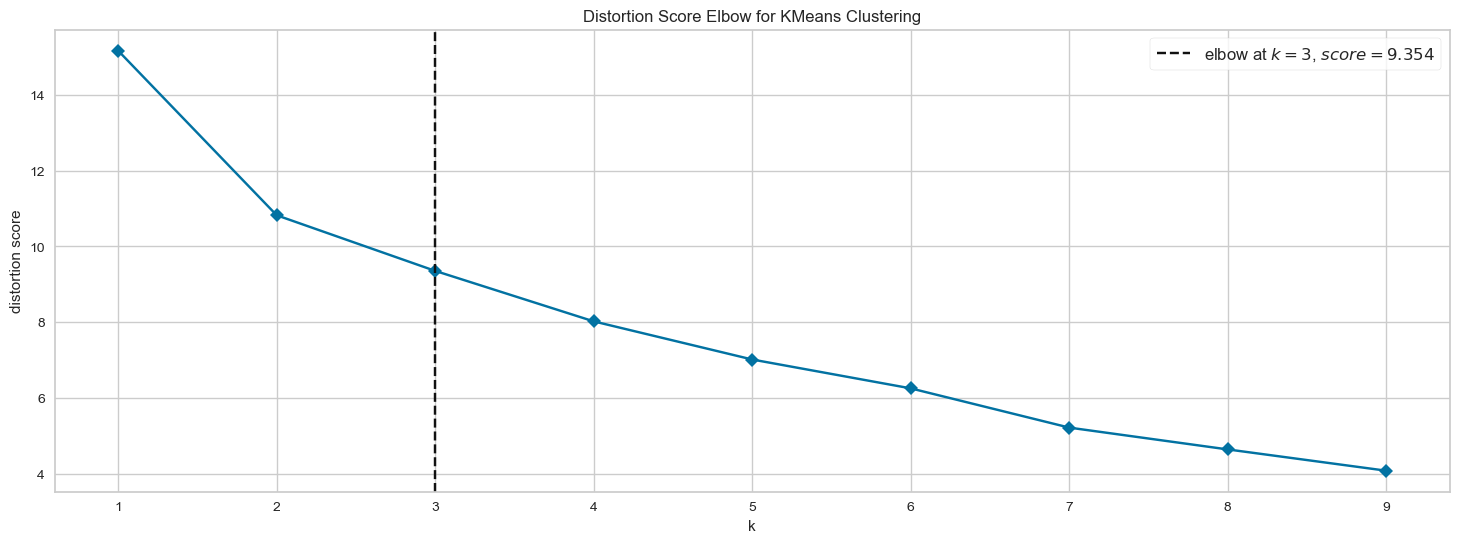

In [60]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(X_scaled)
visualizer.show()
plt.show()

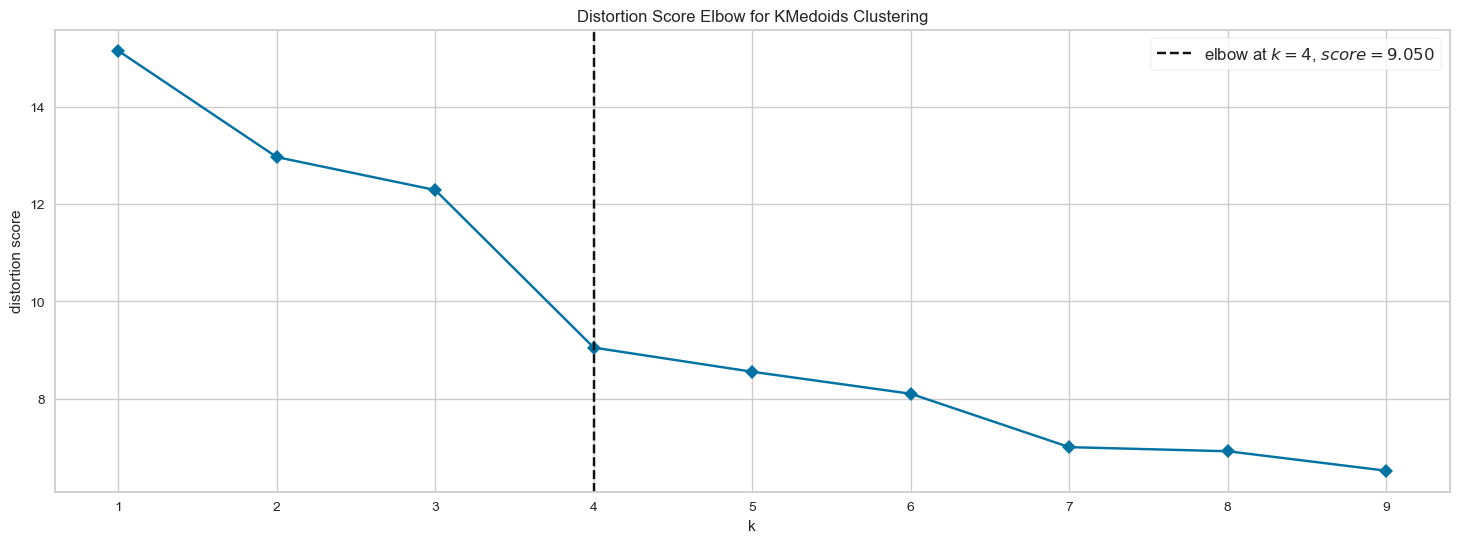

In [61]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(X_scaled)
visualizer.show()
plt.show()

# Convert File

In [62]:
data_clean = data_clean.round()
data_clean.to_excel("dataset indo/hasil model/data_clean.xlsx", index=False)

In [63]:
data_agg = data_agg.round()
data_agg.to_excel("dataset indo/hasil model/data_agg.xlsx", index=False)

In [64]:
data_tranform = data_tranform.round()
data_tranform.to_excel("dataset indo/hasil model/data_transformasi.xlsx", index=False)

In [65]:
X_scaled = X_scaled.round(2)
X_scaled.to_excel("dataset indo/hasil model/data_norm1.xlsx", index=False)

In [66]:
data_norm = data_norm.round(2)
data_norm.to_excel("dataset indo/hasil model/data_norm2.xlsx", index=False)

In [67]:
data_model = data_model.round(2)
data_model.to_excel("dataset indo/hasil model/data_model.xlsx", index=False)

In [68]:
C1.to_excel("dataset indo/hasil model/C1.xlsx", index=False)
C2.to_excel("dataset indo/hasil model/C2.xlsx", index=False)
# C3.to_excel("dataset indo/hasil model/C3.xlsx", index=False)
# C4.to_excel("dataset indo/hasil model/C4.xlsx", index=False)
# C5.to_excel("dataset indo/hasil model/C5.xlsx", index=False)

In [69]:
results_dbi.to_excel("dataset indo/hasil model/result_dbi.xlsx", index=False)
best_dbi_results.to_excel("dataset indo/hasil model/best_model_dbi.xlsx", index=False)

In [70]:
results_Silhouette.to_excel("dataset indo/hasil model/result_silhouette.xlsx", index=False)
best_silhouette_results.to_excel("dataset indo/hasil model/best_model_silhouette.xlsx", index=False)

In [71]:
linkage_results.to_excel("dataset indo/hasil model/linkage_results.xlsx", index=False)